In [12]:
import xhermes
from xhermes.utils import guard_replace_1d
from xhermes.balances import Balance1D
import xbout
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
ds = xhermes.open(
    r"C:\Users\Mike\OneDrive\Project\collab\tech\cases\fix-1d-recycling\fix1drec6-more_detached",
    keep_yboundaries = True
    )

ds = ds.hermes.extract_1d_tokamak_geometry()

In [16]:
bal = xhermes.balances.Balance1D(ds)
bal.get_terms()

Warning! Sd+_sheath not found, results may be incorrect
Warning! Ee_sheath not found, results may be incorrect
Warning! Ed+_sheath not found, results may be incorrect
|||WARNING: Overwriting sheath diagnostics with calculated values
Sheath diagnostics not available, attempting to reconstruct...


In [18]:
bal.get_tallies()

Ed_src is zero, dropping


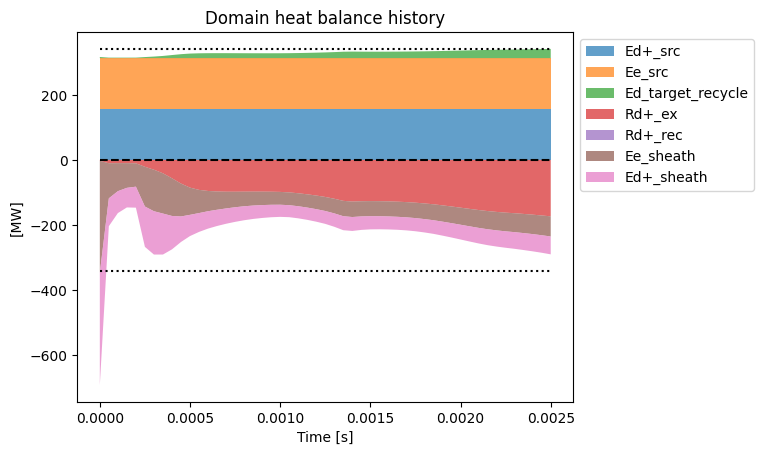

In [19]:
bal.plot_heat_balance()

In [50]:
ds.isel(pos=-3).dims

FrozenMappingWarningOnValuesAccess({'t': 51})

In [ ]:
# Select final domain cell and inner guard cell at final time slice
last = ds.isel(pos=-3, t = -1)
guard = ds.isel(pos=-2, t = -1)

def value_at_target(name):
    return ((last[name] + guard[name]) / 2).values

Mi = 2*1.6726219e-27

mom_sheath = value_at_target("NVd+")   # Momentum in kg m^-2 s^-1
pflux_sheath = mom_sheath / Mi         # Particle flux in m^-2 s^-1

print(f"Particle flow at the sheath: {pflux_sheath:.3e} m^-2 s^-1")

Particle flow at the sheath: 8.025e+24 m^-2 s^-1


In [36]:
from xhermes.utils import guard_replace_1d

Mi = 2*1.6726219e-27

final_time_slice = ds.isel(t=-1)
Spar = guard_replace_1d(final_time_slice["pos"].values)
momentum = guard_replace_1d(final_time_slice["NVd+"].values)  # Momentum in kg m^-2 s^-1
particle_flux = momentum / Mi                                 # Particle flux in m^-2 s^-1

sheath_particle_flux = particle_flux[-1]

print(f"Particle flow at the sheath: {sheath_particle_flux:.3e} m^-2 s^-1")

Particle flow at the sheath: 8.025e+24 m^-2 s^-1


In [ ]:
final_time_slice = ds.isel(t=-1)
particle_flow = final_time_slice["pfd+_tot_ylow"].isel(pos=-2)
sheath_area = final_time_slice["da"]

array(5.04228201e+25)

In [ ]:
guard_value = ds["Te"].isel(pos=-2)
last_value = ds["Te"].isel(pos=-3)
target_value = (guard_value + last_value)/2

FrozenMappingWarningOnValuesAccess({})

In [38]:
particle_flux

array([ 0.00000000e+00,  3.99259021e+20,  1.17516181e+21,  1.94075210e+21,
        2.71596585e+21,  3.48764731e+21,  4.25776210e+21,  5.02629270e+21,
        5.79310897e+21,  6.55828036e+21,  7.32182114e+21,  8.08375016e+21,
        8.84408651e+21,  9.60284747e+21,  1.03600500e+22,  1.11157107e+22,
        1.18698467e+22,  1.26224751e+22,  1.33736130e+22,  1.41232766e+22,
        1.48714803e+22,  1.56182357e+22,  1.63635522e+22,  1.71074378e+22,
        1.78499002e+22,  1.85909486e+22,  1.93305949e+22,  2.00688535e+22,
        2.08057418e+22,  2.15412792e+22,  2.22754860e+22,  2.30083818e+22,
        2.37399844e+22,  2.44703084e+22,  2.51993654e+22,  2.59271640e+22,
        2.66537113e+22,  2.73790130e+22,  2.81030737e+22,  2.88258966e+22,
        2.95474831e+22,  3.02678322e+22,  3.09869416e+22,  3.17048079e+22,
        3.24214288e+22,  3.31368032e+22,  3.38509323e+22,  3.45638168e+22,
        3.52754535e+22,  3.59858315e+22,  3.66949301e+22,  3.74027221e+22,
        3.81091810e+22,  

(401,)


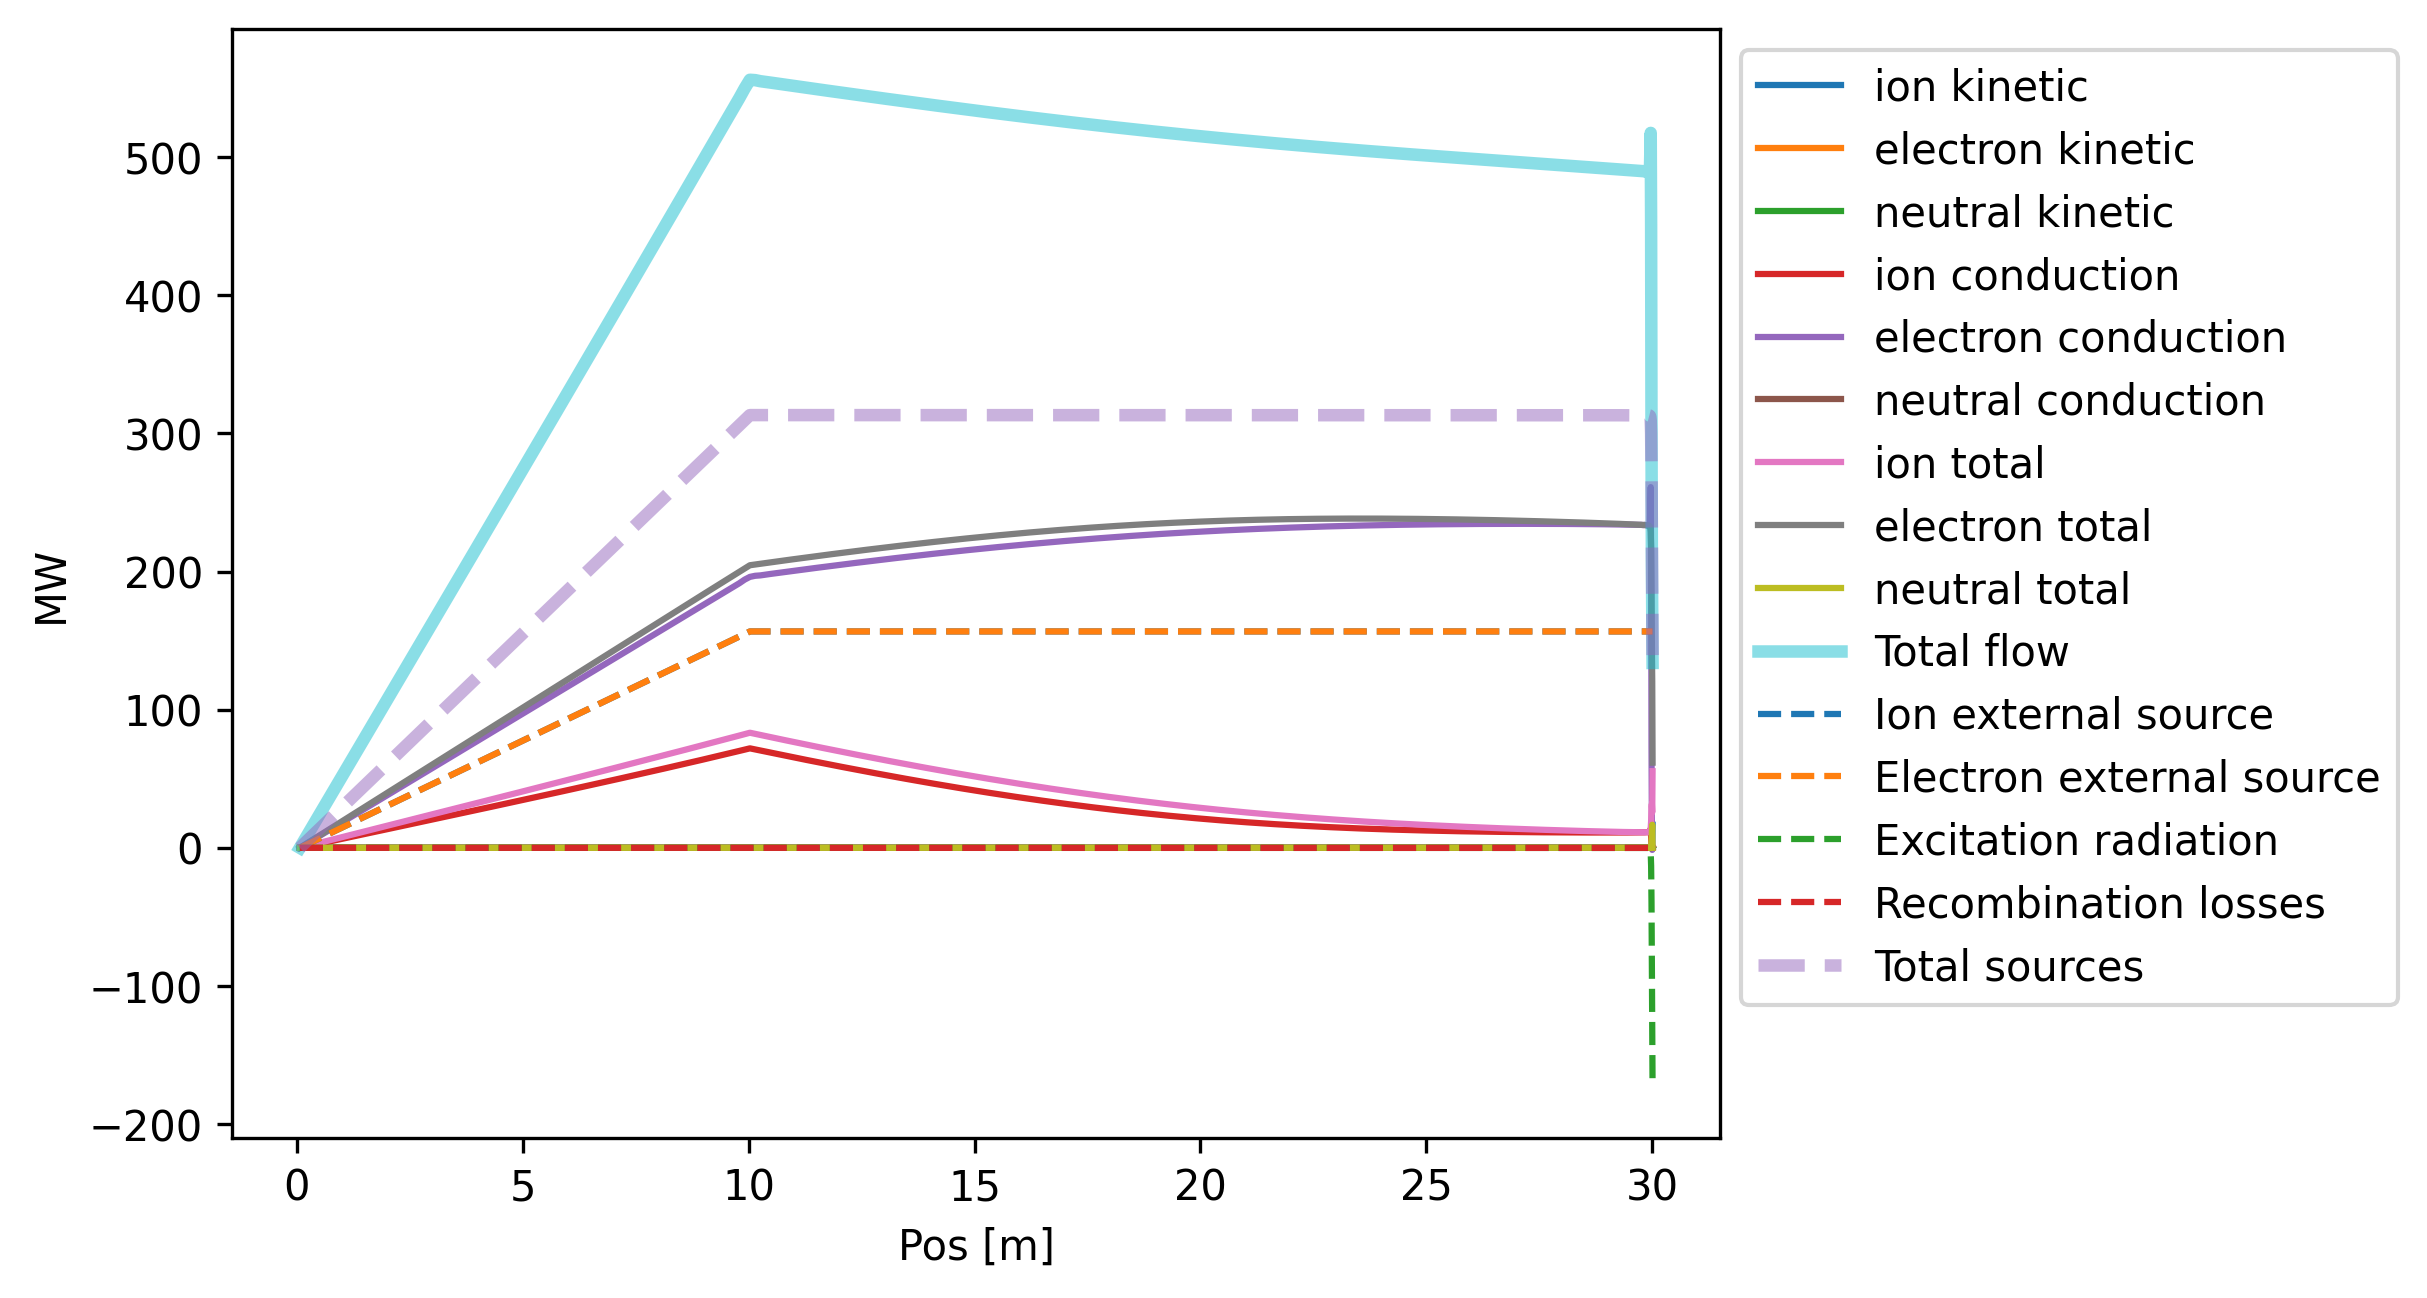

In [22]:
bal.plot_flux_balance2()